# Dependencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('cleaned_hotel_bookings_data.csv')

In [ ]:
df2 = df.copy()

df2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
57155,City Hotel,0,56,2018,May,10,3,0,3,2,...,0,No Deposit,0,0,0,Family,72.00,0,0,Check-Out
5408,Resort Hotel,1,60,2018,October,33,8,1,3,2,...,0,No Deposit,241,0,0,Personal,202.28,0,0,Canceled
78404,City Hotel,0,2,2019,July,18,3,0,1,2,...,0,No Deposit,9,0,0,Personal,180.00,0,2,Check-Out
83521,City Hotel,0,56,2019,September,30,24,1,5,2,...,0,No Deposit,9,0,0,Personal,144.67,0,1,Check-Out
125,Resort Hotel,0,100,2017,September,27,4,1,1,2,...,0,No Deposit,240,0,0,Family,73.80,0,1,Check-Out


In [ ]:
def month_groups(row):
        row = row / 30
        if (row >= 0) & (row <= 3):
            return '0-3 Months'
        if (row > 3) & (row <= 6):
            return '3-6 Months'
        if (row > 6) & (row <= 9):
            return '6-9 Months'
        if (row > 9) & (row <= 12):
            return '9-12 Months'
        if (row > 12):
            return '>12 Months'
    
df2['lead_time_group'] = df2['lead_time'].apply(month_groups)
df2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_group
59311,City Hotel,0,77,2018,June,16,16,2,2,1,...,No Deposit,9,0,0,Family,95.2,0,1,Check-Out,0-3 Months
14557,Resort Hotel,1,26,2018,March,1,2,0,1,2,...,No Deposit,240,0,0,Personal,75.0,0,3,Canceled,0-3 Months
590,Resort Hotel,0,22,2017,September,30,24,0,2,2,...,No Deposit,240,0,0,Family,153.0,0,2,Check-Out,0-3 Months
37653,City Hotel,1,35,2018,May,13,24,0,3,2,...,No Deposit,9,0,0,Personal,125.1,0,0,Canceled,0-3 Months
56247,City Hotel,0,36,2018,April,7,11,0,3,2,...,No Deposit,28,0,0,Personal,64.0,0,0,Check-Out,0-3 Months


In [ ]:
df2 = df2.groupby(['hotel', 'lead_time_group']).agg({
        "is_canceled": ["sum", "count"]
    })

df2 = df2.reset_index() 
df2.columns = ['hotel_type', 'lead_time_group', 'total_cancellation', 'total_booking']

df2.sample(5)

,hotel_type,lead_time_group,total_cancellation,total_booking
0,City Hotel,0-3 Months,8913,34824
5,Resort Hotel,0-3 Months,3916,21291
9,Resort Hotel,>12 Months,43,244
7,Resort Hotel,6-9 Months,1241,3637
8,Resort Hotel,9-12 Months,553,1438


In [ ]:
df2['cancellation_rate'] = df2['total_cancellation'] * 100 / df2['total_booking']
df2['cancellation_rate'] = df2['cancellation_rate'].round(2)

df2.sample(5)

,hotel_type,lead_time_group,total_cancellation,total_booking,cancellation_rate
0,City Hotel,0-3 Months,8913,34824,25.59
5,Resort Hotel,0-3 Months,3916,21291,18.39
3,City Hotel,9-12 Months,744,1338,55.61
6,Resort Hotel,3-6 Months,2123,6583,32.25
7,Resort Hotel,6-9 Months,1241,3637,34.12


In [ ]:
city = df2[df2['hotel_type'] == 'City Hotel'].reset_index(drop=True)
resort = df2[df2['hotel_type'] == 'Resort Hotel'].reset_index(drop=True)

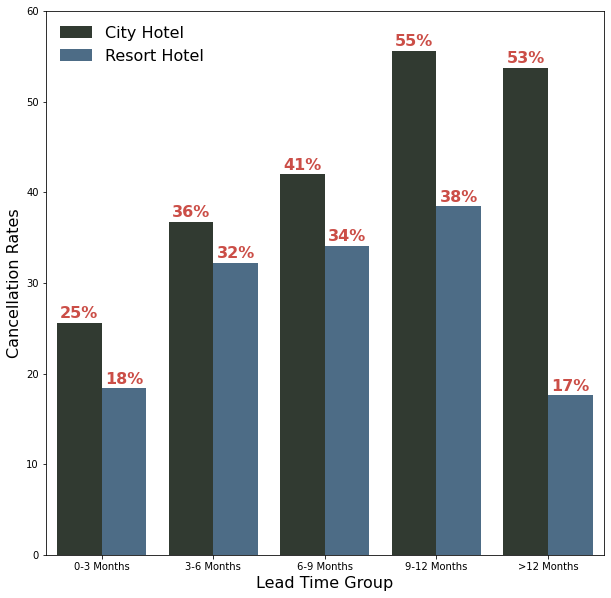

In [ ]:
color_palette = ['#2F3B30', '#436D90']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data=df2, x='lead_time_group', y='cancellation_rate', 
            hue='hotel_type', ax=ax, palette=color_palette)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='upper left', 
          frameon=False, fontsize=16)

for i in city['cancellation_rate'].index:
    ax.annotate(
        f"{int(city['cancellation_rate'][i])}%", 
        xy=(i-0.2, city['cancellation_rate'][i] + 1),
        va='center', ha='center', color='#CB4E47',
        fontweight='bold', fontsize=16
    )
    
for i in resort['cancellation_rate'].index:
    ax.annotate(
        f"{int(resort['cancellation_rate'][i])}%", 
        xy=(i+0.2, resort['cancellation_rate'][i] + 1),
        va='center', ha='center', color='#CB4E47',
        fontweight='bold', fontsize=16
    )
    
plt.grid(False)
plt.ylabel('Cancellation Rates', fontsize=16)
plt.xlabel('Lead Time Group', fontsize=16)
plt.ylim([0, 60])
plt.show()